Aurélien JEANNEAU
Jiale KANG

# Le ukulélé est il une petite guitare ?

L'objectif de ce travail est de différencier la guitare et le Ukulele par la réponse en fréquence de sa caisse de résonance.

Ce qui diffère en premier lieu entre une guitare et un Ukulélé est la taille de l'instrument, et sa forme.
On peut décomposer la guitare et le Ukulele dans les mêmes décompositions élémentaires.
Elles sont composées en 4 parties :
- La corde (non étudié ici)
- Le résonateur : qui comprend la cavité et le volume d'air
- La face avant du résonateur
- La face arrière du résonateur
Ce sont les éléments qui entrent en mouvement lors de l'excitation d'une corde.
On considère que la face arrière n'a qu'une influence minime puisque lorsque l'utilisateur joue de son Ukulélé, il pose la face arrière sur son buste ce qui amortit les vibrations. Le luthier souhaite donc qu'il y ait le moins d'énergie transmise possible à l'arrière de l'instrument. On ne va pas l'étudier aujourd'hui.

La guitare utilisée ici est une guitare Yamaha C40 classique. Elle n'a pas de barrages lattice, c'est une guitare très répandue dans l'industrie de diapason 650mm.
Le Ukulélé est un Ukulele Tanglewood Soprano tiare, de diapason 345mm

On définie un modèle basse fréquence :

Pour faire ce modèle, on ne va concidèrer qu'une partie de la décomposition élémentaire. A savoir le résonnateur et la face avant du résonnateur.

Protocole expérimental :

On immobilise les cordes de la guitare et du ukulele, puis on mesure à l'aide d'un accéléromêtre et d'un marteau placé au niveau du chevalet.
On place le marteau et le chevalet au même endroit, car c'est ici qu'il y a le ventre de vibration du premier mode de la guitare, qui est important pour l'analyse basse fréquence. (FletcherRossing_Ch9) De cette manière on n'est pas non plus importuné par les modes de la face arrière de l'instruments. 

Le changement de volume est due au déplacement de la colonne d'air du résonnateur et du piston 
$$\Delta V = Ax_p + Bx_a$$ 

On applique un principe fondamental de la dynamique sur sur le piston puis sur le résonnateur.

$m_p \ddot{x_p} + k_p x_p + R_p \dot{x_p} - A \Delta P = F$

$m_a \ddot{x_a} + R_a \dot{x_a} - S \Delta P = 0$

$\Delta P$ peut être exprimé en fonction de $x_a$ et $x_p$
Ce sont donc deux équations couplées qui sont analytiquement résolvable.

Le modèle possède donc deux oscilateurs. Qui sont caractéristiques de la hauteur de la note obtenue, mais absolument pas du timbre. 

On prend aussi en compte les forces résistives de l'air. Il s'agit de l'énergie dissipée par frottement visqueux. Ces frottements permettent de déterminer le temps de la note et sont des pertes par rayonnement de l'onde sonore.

On concidère qu'il n'y a pas de transfert de température, d'où delta $p = - \mu \Delta V $.

On trouve finalement le système d'équation :

$m_p \ddot{x_p} + (k_p + \mu A^2 ) x_p + R_p \dot{x_p} = F$

$m_a \ddot{x_a} - R_a \dot{x_a} - S \Delta P = 0$

En forme matricielle :

$$M \ddot{X} + R \dot{X} + K X = F$$



$ M = \begin{bmatrix} m_p & 0 \\ 0 & m_a \end{bmatrix}  $
$ R = \begin{bmatrix} R_p & 0 \\ 0 & R_a \end{bmatrix}  $
$ C = \begin{bmatrix} k_p + \mu A^2 & \mu S A \\ \mu S A & \mu S^2  \end{bmatrix}  $

On applique une transformée de Fourier
$$(-\omega^2 M  + j \omega R + K ) X = F$$
On appelle $ \mathbb{G} =  -\omega^2 M  + j \omega R + K $
d'où $$ \mathbb{G} X = F $$

On peut avant noter deux pulsations remarcables : $\omega_p = \left[\frac{k_p + \mu A^2}{m_p}\right]^{1/2}$ et $\omega_h = \left[\frac{\mu S^2}{m_a}\right]^{1/2}$ et le facteur de couplage $\alpha = \mu S A$.

Si $ det(\Omega) = 0 $, alors, on peut déterminer les fréquences de coupures. d'où en négligeant les frottements :
$$(\omega^2 -\omega_p^2)(\omega^2 -\omega_a^2) - \frac{\alpha^2}{m_p m_a} = 0$$
D'où avec le changement de variable $\Omega =\omega^2$, on obtient une equation de degré 2 dont les racines sont :
$$\omega_\pm ^ 2 = 1/2(\omega_p^2 + \omega_h^2) \pm 1/2 \left[ (\omega_p^2 - \omega_h^2)^2 +4 \frac{\alpha}{(m_p m_a)^{1/2}} \right]^{1/2}$$

Nous avons maintenant tout ce qu'il faut pour appliquer ce modèle à la guitare et à l'ukulélé.

In [ ]:
import numpy as np

c = 343.3 #m/s
rho = 1.205 #kg/m3
Poisson_coef = 0.2 # pour du bois

# valeurs pour un ukulele

#V_u = (0.345*520/752.2)*(0.345*330/752.2)*(0.345*90/752.2)
#S_u = np.pi*(0.345*104/(2*752.2))**2
#A_u = np.pi*(0.345*287/(752.2*2))**2
V_u = 0.238*0.151*0.041
S_u = np.pi*(0.024)**2
rho_tilleul = 417 #kg/m3
A_u = np.pi*0.066**2
mu_u = c**2*rho/V_u
e_u = 1.5E-3
m_p_u = A_u*e_u*rho_tilleul
m_a_u = S_u*e_u*rho
E_tilleul = 7000

# valeurs pour une guitare
#V_g = (0.650*2780/3732)*(0.650*1900/3732)*(0.650*432/3732)*4
#S_g = np.pi*(0.650*501/3838/2)**2
#A_g = np.pi* (0.650*1675/3838/2)**2
V_g = 0.484*0.331*0.075
S_g = np.pi*0.042**2
rho_epicea = 450 #kg/m3
# on prend pour la surface vibrante de la guitare un cercle de diametre environ égale à la partie inférieure de l'instrument
A_g = np.pi* 0.141**2
mu_g = c**2*rho/V_g
e_g = 2.7E-3
m_p_g = A_g*e_g*rho_epicea
m_a_g = S_g*e_g*rho
# stiffness of wood and young module https://amesweb.info/Materials/Youngs-Modulus-of-Wood.aspx https://en.wikipedia.org/wiki/Vibration_of_plates
E_epicea = 9000

# On regroupe pour éviter de se perdre avec les indices, l'indice 0 est la guitare, l'indice 1 est le ukulele 
A = np.array([A_g, A_u])
rho_bois = np.array([rho_epicea, rho_tilleul])
V = np.array([V_g, V_u])
S = np.array([S_g, S_u])
e = np.array([e_g, e_u])
m_p = np.array([m_p_g, m_p_u])
m_a = np.array([m_a_g, m_a_u])
mu = np.array([mu_g, mu_u])
E = np.array([E_epicea, E_tilleul])


def model_guitar(e,mu,A,S,m_a,m_p,E,Poisson_coef):
    k_p = 2*E*e**3/(3*(1-Poisson_coef**2))/A

    omega_p = ((k_p + mu*A**2)/m_p)**0.5
    omega_h = ((mu*S**2)/m_a)**0.5
    alpha = S*A*mu

    omega1 = (0.5*(omega_p**2+omega_h**2)-0.5*((omega_p**2-omega_h**2)**2+4*alpha/(m_p*m_a)**0.5)**0.5)**0.5

    omega2 = (0.5*(omega_p**2+omega_h**2)+0.5*((omega_p**2-omega_h**2)**2+4*alpha/(m_p*m_a)**0.5)**0.5)**0.5

    return omega1, omega2

omega1,omega2 = model_guitar(e,mu,A,S,m_a,m_p,E,Poisson_coef)
print("guitar first frequencies : ", omega1[0]/(2*np.pi), ' and ', omega2[0]/(2*np.pi))
print("ukulele first frequencies : ", omega1[1]/(2*np.pi), ' and ', omega2[1]/(2*np.pi))

guitar first frequencies :  124.05835106909714  and  714.1163429496789
ukulele first frequencies :  231.11268958808859  and  1563.3837855257289


Comparons ces valeurs avec l'expérience.

In [209]:
from scipy.signal import find_peaks

def get_local_maximas(data, frequences, nb_pics, width=100):
    """
    Identifies local maxima in the given data array and returns the maxima with their corresponding frequencies.
    Returns:
    tuple: A tuple of two numpy arrays:
        - maxima_values: Values of the local maxima in the data.
        - maxima_frequencies: Frequencies corresponding to the local maxima.
    """
    # Identify indices of local maxima
    maxima_indices = find_peaks(np.abs(data), distance = data.shape[0]/nb_pics, width=width)[0]
    # Get the corresponding maxima values and frequencies
    maxima_values = data[maxima_indices]
    maxima_frequencies = frequences[maxima_indices]
    
    return maxima_values, maxima_frequencies

    return maxima_values, maxima_frequencies
def to_db(expr):
    return 20 * np.log(np.abs(expr))

frequences from experience guitar :  [103.02734375 196.77734375]
frequences from experience ukulele:  [272.8515625 413.8671875]


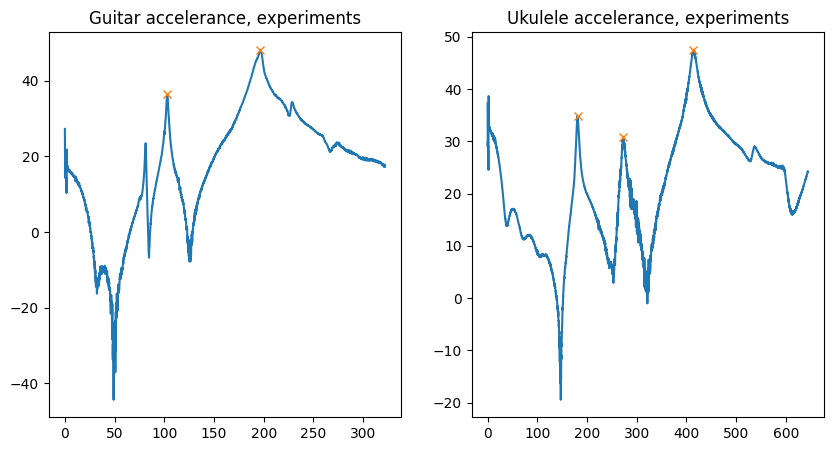

In [210]:
import scipy.io
import matplotlib.pyplot as plt
mat_g = scipy.io.loadmat('./guitar/A vide 3.fig.mat')
frequencies_g = mat_g["frequency"][0][0:3300]
accelerance_g = mat_g["accelerance"][0][0:3300]

max_values_g, max_freq_g = get_local_maximas(accelerance_g,frequencies_g,6)
print("frequences from experience guitar : ", max_freq_g[0:2])

mat_u = scipy.io.loadmat('./ukulele/ukulele void 2.fig.mat')
frequencies_u = mat_u["frequency"][0][0:3300]
accelerance_u = mat_u["accelerance"][0][0:3300]

max_values_u, max_freq_u = get_local_maximas(accelerance_u,frequencies_u,8)
print("frequences from experience ukulele: ", max_freq_u[1:3])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(frequencies_g,accelerance_g)
ax[0].set_title("Guitar accelerance, experiments")
ax[0].plot(max_freq_g, max_values_g, "x")
ax[1].plot(frequencies_u,accelerance_u)
ax[1].set_title("Ukulele accelerance, experiments")
ax[1].plot(max_freq_u, max_values_u, "x")



On obtient des fréquences qui ne sont pas concordante avec la réalité. La première fréquence est dans l'ordre de grandeur, mais la seconde non. Cela peut être du à la mesure approximative des mesures de l'instrument, au modèle trop simpliste, la géométrie de la guitare.
C'est pour cela que dans le papier, les valeurs f1, f2 sont définies comme connues avant l'expérience, et les valeurs des pulsations omega_p et omega_h sont déterminées à partir de ces fréquences et non de la géométrie de la guitare.  (ChristensenVistisen 1980)
L'objectif maintenant est de suivre le comportement des fréquences et voir si le même comportement est vu pour les cordes ou les percussions.
Le premier pic que l'on peut observer n'a pas de rapport avec le premier mode, il est due à la géométrie de l'instrument.

## Avec un collier

On augmente expérimentalement la masse $m_a$ en rajoutant un col à la bouche guitare et du Yukulele de 3cm.

In [172]:
import numpy as np

c = 343.3 #m/s
rho = 1.205 #kg/m3
Poisson_coef = 0.2 # pour du bois

# valeurs pour un ukulele

#V_u = (0.345*520/752.2)*(0.345*330/752.2)*(0.345*90/752.2)
V_u = 0.238*0.151*0.041
S_u = np.pi*(0.024)**2
rho_tilleul = 417 #kg/m3
A_u = np.pi*0.066**2
mu_u = c**2*rho/V_u
e_u = 1.5E-3
e_a_u = 1.5E-3+3.0E-2
m_p_u = A_u*e_u*rho_tilleul
m_a_u = S_u*e_a_u*rho
E_tilleul = 7000


# valeurs pour une guitare
V_g = 0.484*0.331*0.075
S_g = np.pi*0.042**2
rho_epicea = 450 #kg/m3
A_g = np.pi* 0.141**2
mu_g = c**2*rho/V_g
e_g = 2.7E-3
e_a_g = 2.7E-3+3.0E-2

m_p_g = A_g*e_g*rho_epicea
m_a_g = S_g*e_a_g*rho
E_epicea = 9000

omega1_u,omega2_u = model_guitar(e_u,mu_u,A_u,S_u,m_a_u,m_p_u,E_tilleul,Poisson_coef)
omega1_g,omega2_g = model_guitar(e_g,mu_g,A_g,S_g,m_a_g,m_p_g,E_epicea,Poisson_coef)
print("guitar first frequencies : ", omega1_g/(2*np.pi), ' and ', omega2_g/(2*np.pi))
print("ukulele first frequencies : ", omega1_u/(2*np.pi), ' and ', omega2_u/(2*np.pi))

guitar first frequencies :  124.0582720799778  and  205.19987909280127
ukulele first frequencies :  231.11262925953577  and  341.1583575186864


L'augmentation d'un facteur 10 de l'épaisseur du col à fait chuter le pic 2 de notre modèle. Expérimentalement :

frequences from experience guitar :  [ 94.921875  195.8984375]
frequences from experience ukulele:  [247.8515625 406.640625 ]


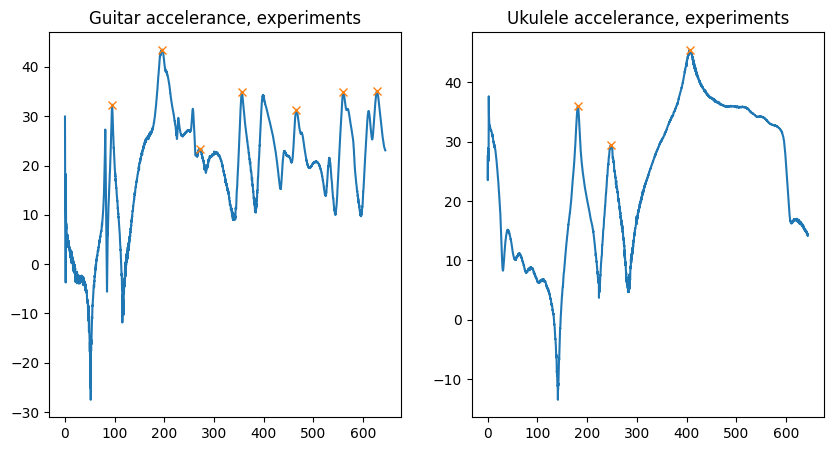

In [173]:
import scipy.io
import matplotlib.pyplot as plt
mat_g = scipy.io.loadmat('./guitar/3cm2.fig.mat')
frequencies_g = mat_g["frequency"][0][0:3300]
accelerance_g = mat_g["accelerance"][0][0:3300]

max_values_g, max_freq_g = get_local_maximas(accelerance_g,frequencies_g,10,20)
print("frequences from experience guitar : ", max_freq_g[0:2])

mat_u = scipy.io.loadmat('./ukulele/3cm collier uku 3.fig.mat')
frequencies_u = mat_u["frequency"][0][0:3300]
accelerance_u = mat_u["accelerance"][0][0:3300]

max_values_u, max_freq_u = get_local_maximas(accelerance_u,frequencies_u,10)
print("frequences from experience ukulele: ", max_freq_u[1:3])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(frequencies_g,accelerance_g)
ax[0].set_title("Guitar accelerance, experiments")
ax[0].plot(max_freq_g, max_values_g, "x")
ax[1].plot(frequencies_u,accelerance_u)
ax[1].set_title("Ukulele accelerance, experiments")
ax[1].plot(max_freq_u, max_values_u, "x")



Le modèle prévoie une chute du deuxième pic, alors que c'est le premier pic qui baisse le plus de valeur. Dans les deux cas.

## Sans le résonateur


In [195]:
import numpy as np

# valeurs pour un ukulele
V_u = 0.238*0.151*0.041
S_u = 0
A_u = np.pi*0.066**2
mu_u = c**2*rho/V_u
e_u = 1.5E-3
e_a_u = 1.5E-3
m_a_u = 0.00001

# valeurs pour une guitare
V_g = 0.484*0.331*0.075
S_g = 0
A_g = np.pi* 0.141**2
mu_g = c**2*rho/V_g
e_g = 2.7E-3
e_a_g = 2.7E-3
m_p_g = A_g*e_g*rho_epicea
m_a_g = 0.00001

omega1_u,omega2_u = model_guitar(e_u,mu_u,A_u,S_u,m_a_u,m_p_u,E_tilleul,Poisson_coef)
omega1_g,omega2_g = model_guitar(e_g,mu_g,A_g,S_g,m_a_g,m_p_g,E_epicea,Poisson_coef)
print("guitar first frequencies : ", omega1_g/(2*np.pi), ' and ', omega2_g/(2*np.pi))
print("ukulele first frequencies : ", omega1_u/(2*np.pi), ' and ', omega2_u/(2*np.pi))

guitar first frequencies :  0.0  and  124.05836935641527
ukulele first frequencies :  0.0  and  231.11269787019225


frequences from experience guitar :  [188.4765625]
frequences from experience ukulele:  [398.2421875]


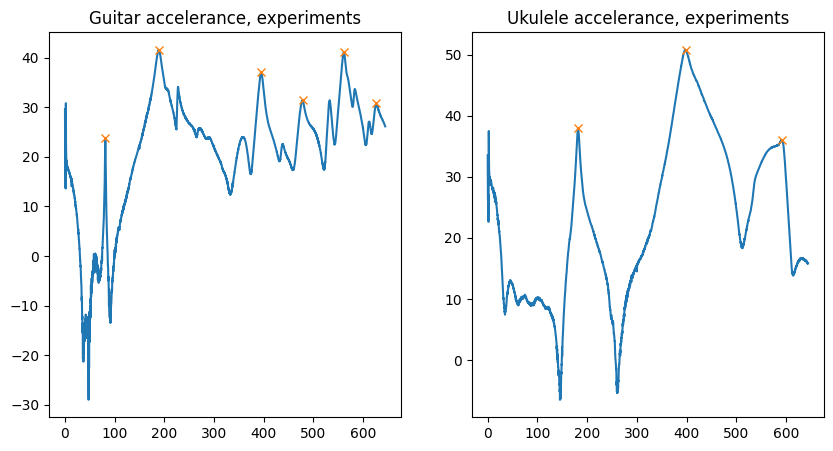

In [207]:
import scipy.io
import matplotlib.pyplot as plt
mat_g = scipy.io.loadmat('./guitar/without helmholz better.fig.mat')
frequencies_g = mat_g["frequency"][0][0:3300]
accelerance_g = mat_g["accelerance"][0][0:3300]

max_values_g, max_freq_g = get_local_maximas(accelerance_g,frequencies_g,10,10)
print("frequences from experience guitar : ", max_freq_g[1:2])

mat_u = scipy.io.loadmat('./ukulele/uku without helmholz 4.fig.mat')
frequencies_u = mat_u["frequency"][0][0:3300]
accelerance_u = mat_u["accelerance"][0][0:3300]

max_values_u, max_freq_u = get_local_maximas(accelerance_u,frequencies_u,10)
print("frequences from experience ukulele: ", max_freq_u[1:2])
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(frequencies_g,accelerance_g)
ax[0].set_title("Guitar accelerance, experiments")
ax[0].plot(max_freq_g, max_values_g, "x")
ax[1].plot(frequencies_u,accelerance_u)
ax[1].set_title("Ukulele accelerance, experiments")
ax[1].plot(max_freq_u, max_values_u, "x")



On remarque expérimentalement que c'est le premier pic qui disparait, alors que dans le modèle c'est le second.

La première résonnance que l'on observe est toujours due à la structure de l'instrument.

## Avec ajout de masse

On ajoute des masse de respectivement 19g pour le ukulele et 40g pour la guitare

In [202]:
import numpy as np

c = 343.3 #m/s
rho = 1.205 #kg/m3
Poisson_coef = 0.2 # pour du bois

# valeurs pour un ukulele

#V_u = (0.345*520/752.2)*(0.345*330/752.2)*(0.345*90/752.2)
V_u = 0.238*0.151*0.041
S_u = np.pi*(0.024)**2
rho_tilleul = 417 #kg/m3
A_u = np.pi*0.066**2
mu_u = c**2*rho/V_u
e_u = 1.5E-3
e_a_u = 1.5E-3
m_p_u = A_u*e_u*rho_tilleul #+ 0.019
m_a_u = S_u*e_a_u*rho
E_tilleul = 7000


# valeurs pour une guitare
V_g = 0.484*0.331*0.075
S_g = np.pi*0.042**2
rho_epicea = 450 #kg/m3
A_g = np.pi* 0.141**2
mu_g = c**2*rho/V_g
e_g = 2.7E-3
e_a_g = 2.7E-3

m_p_g = A_g*e_g*rho_epicea + 0.040
m_a_g = S_g*e_a_g*rho
E_epicea = 9000

omega1_u,omega2_u = model_guitar(e_u,mu_u,A_u,S_u,m_a_u,m_p_u,E_tilleul,Poisson_coef)
omega1_g,omega2_g = model_guitar(e_g,mu_g,A_g,S_g,m_a_g,m_p_g,E_epicea,Poisson_coef)
print("guitar first frequencies : ", omega1_g/(2*np.pi), ' and ', omega2_g/(2*np.pi))
print("ukulele first frequencies : ", omega1_u/(2*np.pi), ' and ', omega2_u/(2*np.pi))

guitar first frequencies :  100.39031177916658  and  714.1163423162602
ukulele first frequencies :  231.11268958808859  and  1563.3837855257289


frequences from experience guitar :  [100.9765625 179.1015625]
frequences from experience ukulele:  [270.5078125 384.1796875]


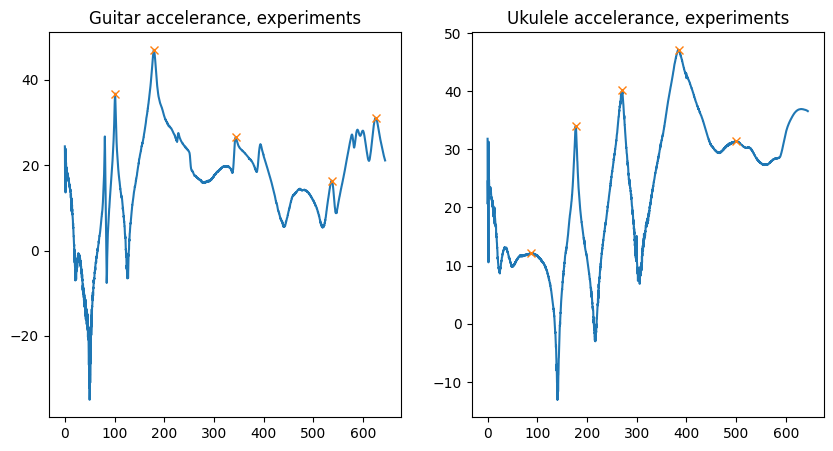

In [196]:
import scipy.io
import matplotlib.pyplot as plt
mat_g = scipy.io.loadmat('./guitar/40g2.fig.mat')
frequencies_g = mat_g["frequency"][0][0:3300]
accelerance_g = mat_g["accelerance"][0][0:3300]

max_values_g, max_freq_g = get_local_maximas(accelerance_g,frequencies_g,10,30)
print("frequences from experience guitar : ", max_freq_g[0:2])

mat_u = scipy.io.loadmat('./ukulele/uku m19.fig.mat')
frequencies_u = mat_u["frequency"][0][0:3300]
accelerance_u = mat_u["accelerance"][0][0:3300]

max_values_u, max_freq_u = get_local_maximas(accelerance_u,frequencies_u,8)
print("frequences from experience ukulele: ", max_freq_u[2:4])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(frequencies_g,accelerance_g)
ax[0].set_title("Guitar accelerance, experiments")
ax[0].plot(max_freq_g, max_values_g, "x")
ax[1].plot(frequencies_u,accelerance_u)
ax[1].set_title("Ukulele accelerance, experiments")
ax[1].plot(max_freq_u, max_values_u, "x")



Il est difficile d'avoir une analyse fine avec un modèle qui ne permet pas d'exprimer avec fidélité l'expérience.

Pour résumer
| | Sans ajout | | Col de 3cm | | Sans Résonateur | |  Ajout masse | |
| - | ---- |---- |----- |----- | ---- | ---- | ---- | ----| 
| | guitare    | Ukulele | guitare    | Ukulele | guitare    | Ukulele | guitare    | Ukulele |
|f1| 103 | 273 | 95 | 248 | NaN | NaN | 101 | 270  |
|f2| 197 | 414 | 195 | 407 | 188 | 398| 179 | 384 |

Expérimentalement on remarque que les modes sont couplés, cependant la première résonnance est plus impactées par 
le résonateur de Helmholz que notre modèle prévoie le contraire. 

L'analyse ne permet pas de déterminer si le ukulele est une petite guitare, mais elle s'en rapproche dans les comportement à basse fréquence. Le couplage semble être important pour le ukulele.